In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import warnings
import string
import re
import os
SEED = 24
STOPWORDS = stopwords.words('english')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = r'/home/amrit/Documents/NLP mini project/data/raw/labeled_data.csv'
df = pd.read_csv(path,index_col=[0]) 
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.describe(include='all')

,count,hate_speech,offensive_language,neither,class,tweet
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783
unique,NaN,NaN,NaN,NaN,NaN,24783
top,NaN,NaN,NaN,NaN,NaN,All I need is a 100 million dollars Bc I got t...
freq,NaN,NaN,NaN,NaN,NaN,1
mean,3.243473,0.280515,2.413711,0.549247,1.110277,NaN
std,0.883060,0.631851,1.399459,1.113299,0.462089,NaN
min,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,0.000000,2.000000,0.000000,1.000000,NaN
50%,3.000000,0.000000,3.000000,0.000000,1.000000,NaN
75%,3.000000,0.000000,3.000000,0.000000,1.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


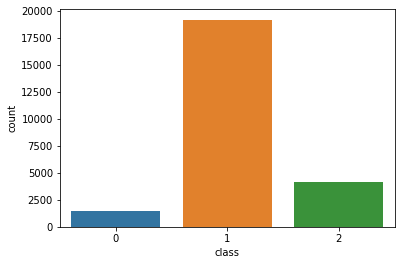

In [5]:
sns.countplot(df['class'])
plt.show()

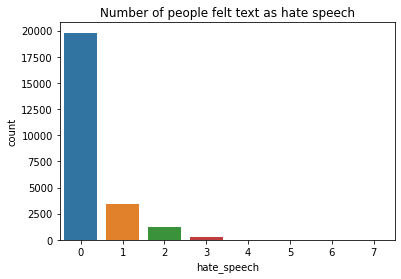

In [6]:
sns.countplot(df['hate_speech'])
plt.title('Number of people felt text as hate speech')
plt.show()

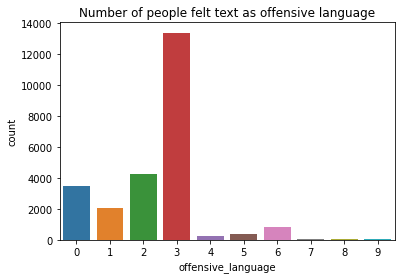

In [7]:
sns.countplot(df['offensive_language'])
plt.title('Number of people felt text as offensive language')
plt.show()

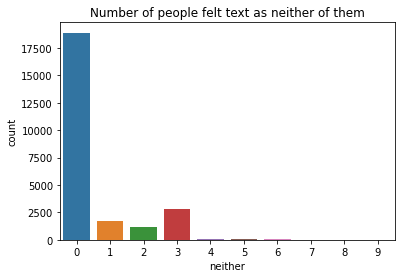

In [8]:
sns.countplot(df['neither'])
plt.title('Number of people felt text as neither of them')
plt.show()

In [9]:
def plot_dist(data):
    
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(data,ax=ax[0])
    sns.boxplot(data,ax=ax[1])
    plt.show()

In [10]:
# number of words
df['Number of words'] = df['tweet'].apply(lambda x: len(x.split(' ')))

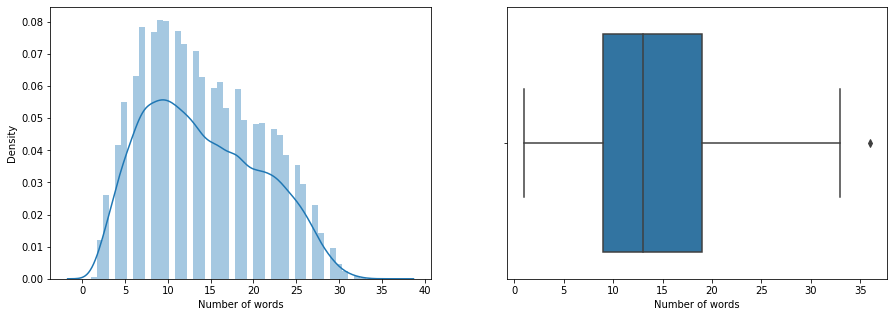

In [11]:
plot_dist(df['Number of words']);

In [12]:
# average word length
df['avg_word_len'] = df['tweet'].apply(lambda x: np.mean([len(c) for c in  x.split(' ')]))

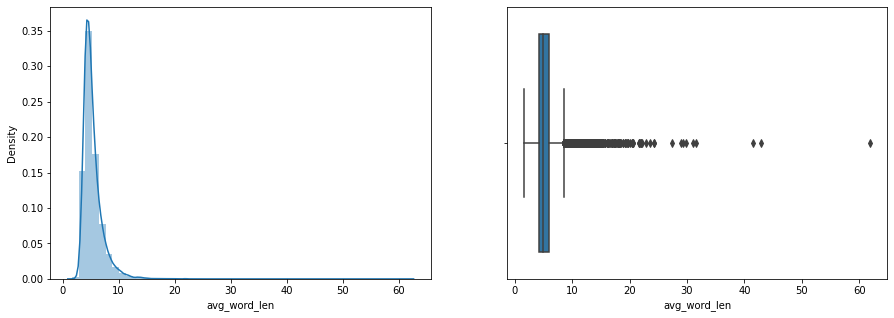

In [13]:
plot_dist(df['avg_word_len']);

In [14]:
# number of stopwords
df['Number of stop words'] = df['tweet'].apply(lambda x: len([c for c in x.split(' ') if c in STOPWORDS]))

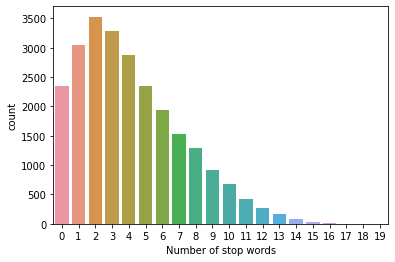

In [15]:
sns.countplot(df['Number of stop words'])
plt.show()

In [16]:
# number of character count
df['Number of char'] = df['tweet'].apply(lambda x: len(x))

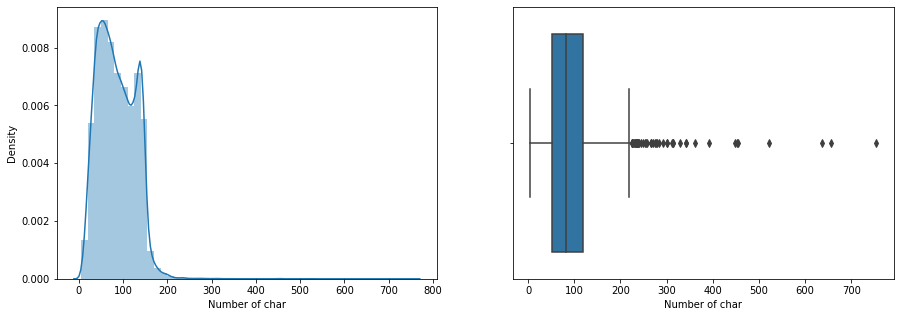

In [17]:
plot_dist(df['Number of char']);

In [18]:
# number of unique
df['Number of unique words'] = df['tweet'].apply(lambda x: len(set(x.split(' '))))

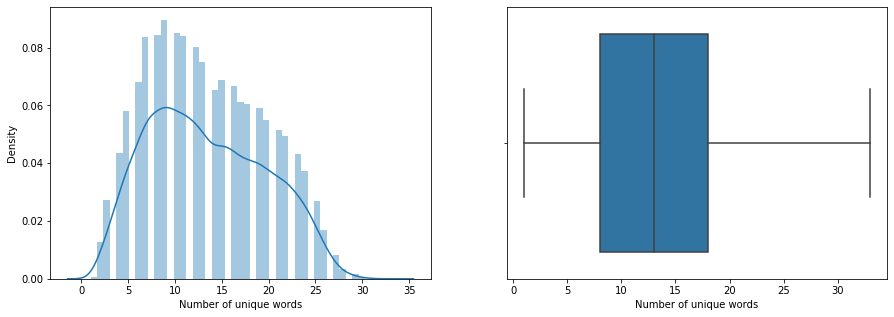

In [19]:
plot_dist(df['Number of unique words']);

In [20]:
# number of urls
df['Number of urls'] = df['tweet'].apply(lambda x: len(re.findall('https?',x)))

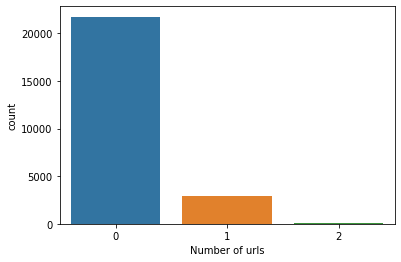

In [21]:
sns.countplot(df['Number of urls'])
plt.show()

In [22]:
# number of emoticons
df['Number of emoticons'] = df['tweet'].apply(lambda x: len(re.findall('&#[0-9]+;',x)))

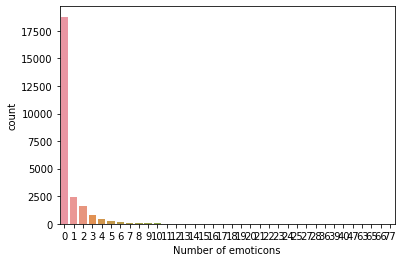

In [23]:
sns.countplot(df['Number of emoticons'])
plt.show()

In [24]:
# number of punctuations
df['Number of punctuations'] = df['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

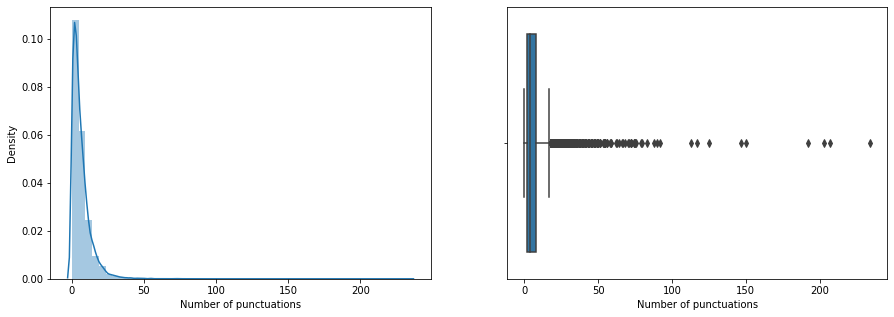

In [25]:
plot_dist(df['Number of punctuations']);

In [26]:
# number of mentions
df['Number of mentions'] = df['tweet'].apply(lambda x: len(re.findall('@',x)))

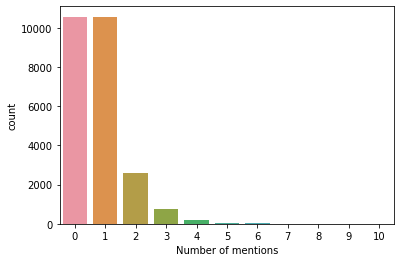

In [27]:
sns.countplot(df['Number of mentions'])
plt.show()

In [28]:
# number of hastags
df['Number of hashtags'] = df['tweet'].apply(lambda x: len(re.findall('#',x)))

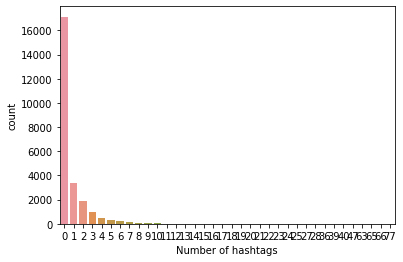

In [29]:
sns.countplot(df['Number of hashtags'])
plt.show()